In [1]:
!git pull
import warnings
warnings.filterwarnings("ignore")


def norm_latext_tab(tab):
    tab = tab[tab.index(r'\begin{tabular}'): tab.index(r'\end{tabular}')+len(r'\end{tabular}')]
    tab = tab.replace('{tabular}', '{array}')
    tab = tab.replace('r@{}c@{}l', 'c')
    tab = tab.replace(r'& $\pm$ &', '\pm')
    tab = tab.replace(r'& \textbf{$\pm$} &', r'\textbf{$\pm$}')
    tab = tab.replace(r'\multirow{4}{*}', '')
    tab = tab.replace(r'\multicolumn{3}{c}', '')
    return tab

Already up to date.


# Extra Experiments
---
In this section, we install ALH on DDPG, to show our argument of plain Bellman Optimization scheme.
We also introduce the two settings, namely ALH-a and ALH-g whose exploration strategies are different.
We run the two ALHs (DDPG version) on 8 different Mujoco environments, on 10 trials each, over 1 million training steps.

Briefly, ALHs shows significant improvements on 4 over 8 environments; and show comparative results on the remaining.
In terms of hard environment (Humanoid), ALHs show strong improvement: the learning curve has up trend, while DDPG is trapped for very long training steps.

The following figures express the learning curves. The shaded region represents half a standard deviation of the average evaluation over 10 trials. Curves are smoothed uniformly for visual clarity.

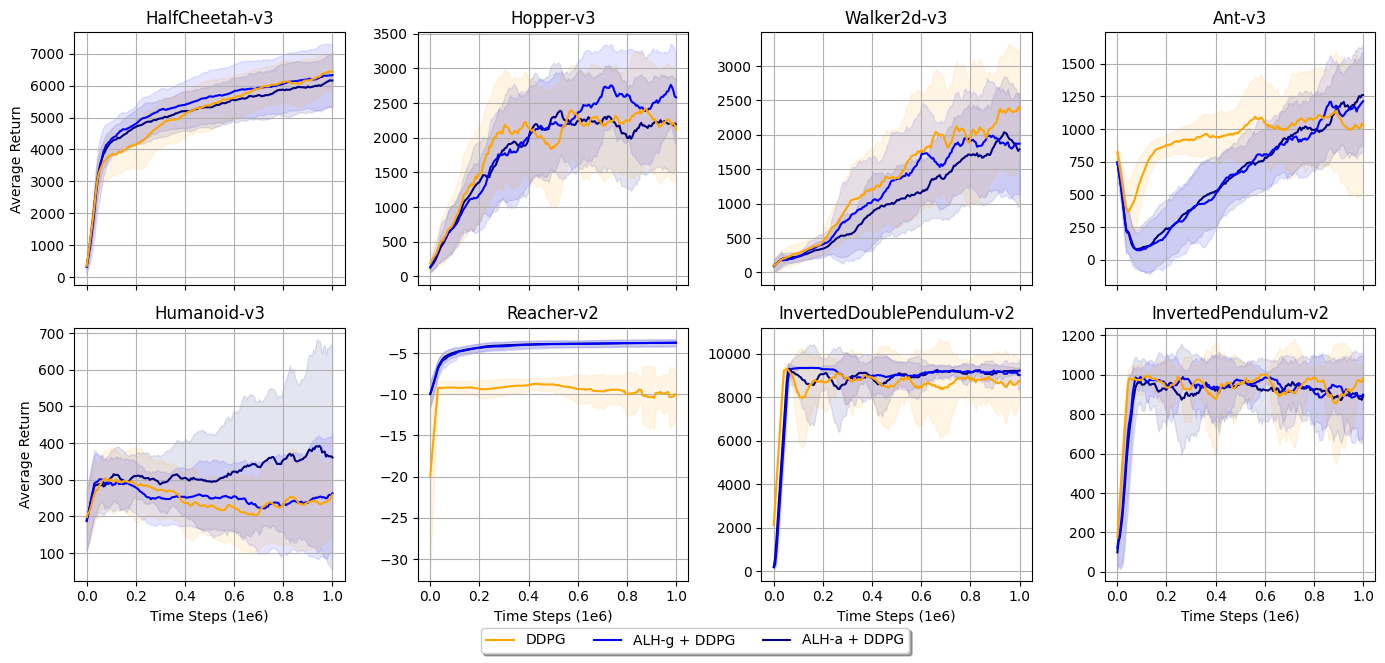

<Figure size 640x480 with 0 Axes>

In [2]:
%matplotlib inline
%run plot_plus.py

Average return of the best performed policy. Maximum values of each row are bolded. $\pm$ corresponds to a single standard
deviation over trials. Normalized score for each policy on a task is 100-scaled min-max normalization across the listed policies.

In [3]:
from IPython.display import Latex
with open('./online_1m_memDDPG_plus.tex','r')as f:
    tab = norm_latext_tab(f.read())
Latex(tab)

<IPython.core.display.Latex object>

Average return of all policies. Maximum values of each row are bolded. $\pm$ corresponds to a single standard
deviation over trials. Normalized score for each policy on a task is 100-scaled min-max normalization across the listed policies.

In [4]:
from IPython.display import Latex
with open('./online_1m_memDDPG_plus_avg.tex','r')as f:
    tab = norm_latext_tab(f.read())
Latex(tab)

<IPython.core.display.Latex object>

# Initially, ALH can not improve learners generalization capability


We report initial results for running ALH (TD3 version) on 8 different Adroit environments, namely:
  "AdroitHandDoor-v1",
  "AdroitHandHammer-v1",
  "AdroitHandPen-v1",
  "AdroitHandRelocate-v1",
  "AdroitHandDoorSparse-v1",
  "AdroitHandHammerSparse-v1",
  "AdroitHandPenSparse-v1",
  "AdroitHandRelocateSparse-v1".
  
The following figures are results of running ALH-g on 3 difference configurations:
- ALH-g (our): as same as reported in our manuscript: we delay hypothesis update by 10 times, and hypothesis dimension is 64.
- ALH-g ($d_h=128$): we delay hypothesis update by 10 times, and hypothesis dimension is 128.
- ALH-g ($f_{mem}=1$): we do not delay hypothesis update (update every training steps), and hypothesis dimension is 64.
Currently, the results are on 2 trials of 250000 training steps.

![updating_results](./initial_Adroit.png)

The current results show that ALH does not improve the generalization capability of the learning agent. Real-life problem, as Adroit environments, often comes with reward sparsity. As our theoretical analysis, as long as learning agent uses plain Bellman optimization, ALH should show the improvement. We are implementing ALH on Q-learning algorithms which are able to solve the reward sparsity problem, and will report as soon as possible.